# Урок 7. Классификация с помощью KNN. Кластеризация K-means

1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
X = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1,
                                                    stratify=y)

In [2]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
        
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # ИЗМЕНЕНО
        dots = np.linspace(1, k, k)
        q = 0.25
        value = list(map(lambda x: q ** x, dots))
        i = 0
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            # ИЗМЕНЕНО
            classes[d[1]] += value[i]
            i += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers


def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [3]:
import numpy as np

k = [1, 2, 5, 10, 20]

for i in k:
    y_pred = knn(X_train, y_train, X_test, i)
    print(f'Точность алгоритма при k = {i}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.658
Точность алгоритма при k = 2: 0.658
Точность алгоритма при k = 5: 0.658
Точность алгоритма при k = 10: 0.658
Точность алгоритма при k = 20: 0.658


In [4]:
def get_graph(X_train, y_train, k):
    cmap = ListedColormap(['red', 'green', 'blue'])
    cmap_light = ListedColormap(['pink', 'olive', 'cyan'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

(58800, 2)


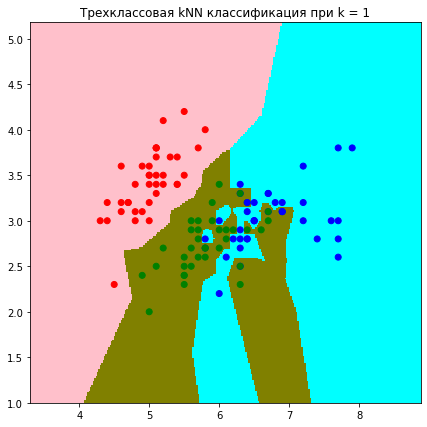

CPU times: user 10min 31s, sys: 878 ms, total: 10min 32s
Wall time: 10min 35s


In [5]:
%%time
get_graph(X_train, y_train, 1)